<a href="https://colab.research.google.com/github/MeleshenkovaAA/-/blob/main/%D0%9F%D0%97_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas 
!pip install seaborn 
!pip install matplotlib

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set(style="darkgrid")

In [3]:
df = pd.read_csv('fortune500.csv')

In [4]:
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [5]:
df.tail()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


In [6]:
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']

In [7]:
len(df)

25500

In [8]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

In [9]:
non_numberic_profits = df.profit.str.contains('[^0-9.-]')
df.loc[non_numberic_profits].head()

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


In [10]:
set(df.profit[non_numberic_profits])

{'N.A.'}

In [11]:
len(df.profit[non_numberic_profits])

369

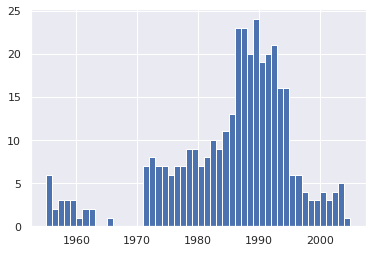

In [13]:
bin_sizes, _, _ = plt.hist(df.year[non_numberic_profits], bins=range(1955, 2006))

In [14]:
df = df.loc[~non_numberic_profits]
df.profit = df.profit.apply(pd.to_numeric)

In [15]:
len(df)

25131

In [16]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

In [17]:
group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year')
avgs = group_by_year.mean()
x = avgs.index
y = avgs.profit

In [18]:
def plot(x, y, ax, title, y_label):
  ax.set_title(title)
  ax.set_ylabel(y_label)
  ax.plot(x, y)
  ax.margins(x=0, y=0)

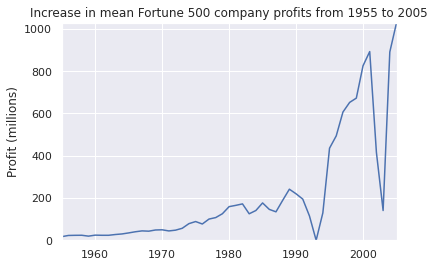

In [19]:
fig, ax = plt.subplots()
plot(x, y, ax, 'Increase in mean Fortune 500 company profits from 1955 to 2005', 'Profit (millions)')

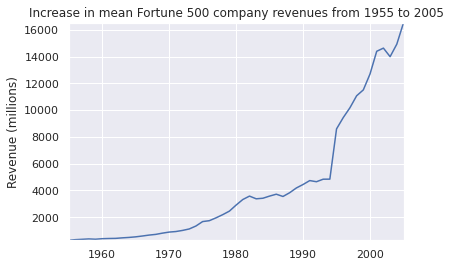

In [20]:
y2 = avgs.revenue
fig, ax = plt.subplots()
plot(x, y2, ax, 'Increase in mean Fortune 500 company revenues from 1955 to 2005', 'Revenue (millions)')

In [21]:
def plot_with_std(x, y, stds, ax, title, y_label):
  ax.fill_between(x, y - stds, y + stds, alpha=0.2)
  plot(x, y, ax, title, y_label)
  fig, (ax1, ax2) = plt.subplots(ncols=2)
  title = 'Increase in mean and std Fortune 500 company %s from 1955 to 2005'
  stds1 = group_by_year.std().profit.as_matrix()
  stds2 = group_by_year.std().revenue.as_matrix()
  plot_with_std(x, y.as_matrix(), stds1, ax1, title % 'profits', 'Profit (millions)')
  plot_with_std(x, y2.as_matrix(), stds2, ax2, title % 'revenues', 'Revenue (millions)')
  fig.set_size_inches(14, 4)
  fig.tight_layout()